# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

**Before starting with this lab, here is a quick reminder about our [Rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins) and the [Policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating).**

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [1]:
import pandas as pd
import bz2

with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [4]:
parties = sorted(training_data['party'].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

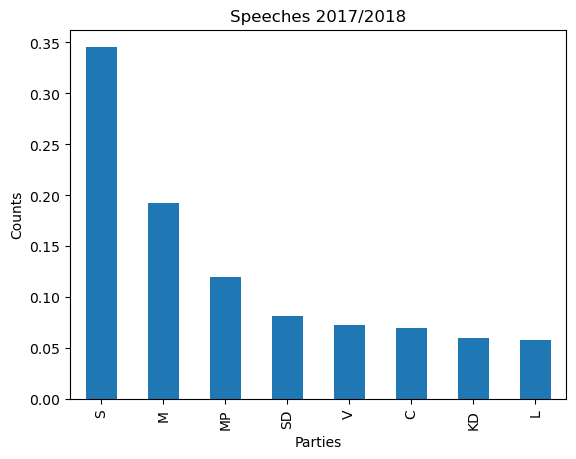

In [5]:
import matplotlib.pyplot as plt
training_data['party'].value_counts(normalize = True).plot(kind='bar')
plt.xlabel("Parties")
plt.ylabel("Counts")
plt.title("Speeches 2017/2018")
plt.show()

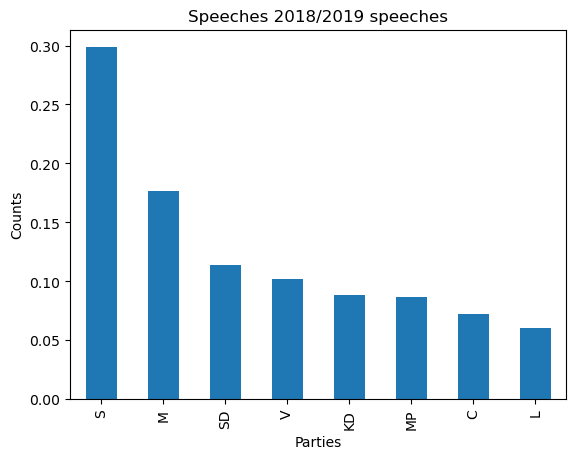

In [6]:
test_data['party'].value_counts(normalize = True).plot(kind='bar')
plt.xlabel("Parties")
plt.ylabel("Counts")
plt.title("Speeches 2018/2019 speeches")
plt.show()

In the training and testing data, top 3 party are in the same order (**S** > **M** > **SD** ), but in the test data, bottom two parties have higher number of speeches than training data.  

The results of 2017/2018 election says S,M and SD owns higher popular rate and S owns the highest one. This result can be seen from the plot, number of speeches can be seen as a represenatation of popular rate.

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

naive_bas = Pipeline([('vec', CountVectorizer()), ('MNB', MultinomialNB())])
naive_bas.fit(training_data["words"],training_data["party"])
print(classification_report(test_data["party"], naive_bas.predict(test_data["words"])))

              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



Yes, the naive bayes is a very simple model, so it works not so good.

## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). What is the performance of the random baseline on the test data?

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clas = Pipeline([('vec', CountVectorizer()), ('dummy', DummyClassifier(strategy = 'stratified'))])
dummy_clas.fit(training_data["words"],training_data["party"])
print(classification_report(test_data["party"], dummy_clas.predict(test_data["words"])))

              precision    recall  f1-score   support

           C       0.09      0.09      0.09       671
          KD       0.10      0.07      0.08       821
           L       0.05      0.05      0.05       560
           M       0.18      0.20      0.19      1644
          MP       0.10      0.14      0.12       809
           S       0.30      0.35      0.32      2773
          SD       0.11      0.08      0.09      1060
           V       0.09      0.07      0.08       950

    accuracy                           0.18      9288
   macro avg       0.13      0.13      0.13      9288
weighted avg       0.17      0.18      0.17      9288



The **baseline Dummy classifier** gives **low accuraccy** for test data when compare with the **multinomail naive bayes classifier**.

An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?

In [9]:
import numpy as np 

dummy_clas2 = Pipeline([('vec', CountVectorizer()), ('dummy', DummyClassifier(strategy = 'most_frequent'))])
dummy_clas2.fit(training_data["words"],training_data["party"])
print(classification_report(test_data["party"], dummy_clas2.predict(test_data["words"])))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00       671
          KD       0.00      0.00      0.00       821
           L       0.00      0.00      0.00       560
           M       0.00      0.00      0.00      1644
          MP       0.00      0.00      0.00       809
           S       0.30      1.00      0.46      2773
          SD       0.00      0.00      0.00      1060
           V       0.00      0.00      0.00       950

    accuracy                           0.30      9288
   macro avg       0.04      0.12      0.06      9288
weighted avg       0.09      0.30      0.14      9288



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of **baseline Dummy classifier** using **most_frequent strategy** is **30 percent**.

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Summarise your results in a short text.

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [10]:
training_data['party'].value_counts()

S     4261
M     2370
MP    1481
SD    1010
V      894
C      865
KD     743
L      719
Name: party, dtype: int64

In [11]:
number_each = training_data['party'].value_counts()[-1]
balanced_df = pd.DataFrame()

for name in parties :
    balanced_df = balanced_df.append(training_data[training_data['party']==name].sample(n=number_each))

balanced_df = balanced_df.sort_index()
print(balanced_df.head())

           id                                              words party
0  H5-002-004  eders majestäter eders kungliga högheter herr ...     S
1  H5-003-001  aktuell debatt om situationen för ensamkommand...     V
3  H5-003-003  herr talman åhörare den här debatten handlar a...     M
4  H5-003-004  herr talman ansvar och rättssäkerhet är två or...    SD
5  H5-003-005  herr talman jag inleder med att tacka vänsterp...    MP


C:\Users\Wuhao\AppData\Local\Temp\ipykernel_9300\3097641878.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(training_data[training_data['party']==name].sample(n=number_each))
C:\Users\Wuhao\AppData\Local\Temp\ipykernel_9300\3097641878.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(training_data[training_data['party']==name].sample(n=number_each))
C:\Users\Wuhao\AppData\Local\Temp\ipykernel_9300\3097641878.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(training_data[training_data['party']==name].sample(n=number_each))
C:\Users\Wuhao\AppData\Local\Temp\ipykernel_9300\3097641878.py:5: FutureWarning: The frame.append

In [12]:
balanced_df['party'].value_counts()

S     719
V     719
M     719
SD    719
MP    719
C     719
L     719
KD    719
Name: party, dtype: int64

In [13]:
naive_bas = Pipeline([('vec', CountVectorizer()), ('MNB', MultinomialNB())])
naive_bas.fit(balanced_df["words"],balanced_df["party"])
print(classification_report(test_data["party"], naive_bas.predict(test_data["words"])))

              precision    recall  f1-score   support

           C       0.27      0.45      0.34       671
          KD       0.29      0.41      0.34       821
           L       0.26      0.43      0.32       560
           M       0.42      0.46      0.44      1644
          MP       0.37      0.35      0.36       809
           S       0.80      0.32      0.46      2773
          SD       0.45      0.44      0.45      1060
           V       0.39      0.57      0.46       950

    accuracy                           0.41      9288
   macro avg       0.41      0.43      0.40      9288
weighted avg       0.50      0.41      0.42      9288



The results here have higher **F1 score** and **accuracy** than results in Problem 2.

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). If you would rather see a visual representation, you can also use [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


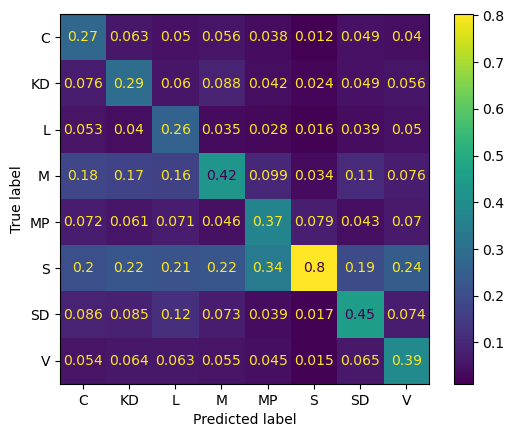

In [15]:
# Wuhao Implementation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(naive_bas, test_data["words"], test_data["party"], normalize = "pred")
plt.show()

From the confusion matrix above, we can manually find the for each p the corressponding p' is:  
| p | p'|
|---|---|
| C | KD|
| KD | M|
| L | C|
| M | C|
| MP | S|
| S | MP|
| SD | L|
| V | SD|

Take a minute to reflect on whether your results make sense.

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words (binary) model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {'vec__binary':(True, False), 'vec__ngram_range':[(1,1), (1,2)], "MNB__alpha" : (1,0.1) }


cv_bas = GridSearchCV(naive_bas, parameters, scoring = "f1_weighted", cv = 5, refit = True)
cv_bas.fit(balanced_df["words"],balanced_df["party"])
cv_bas_best_par = cv_bas.best_params_
print(classification_report(test_data["party"], cv_bas.predict(test_data["words"])))

              precision    recall  f1-score   support

           C       0.32      0.44      0.37       671
          KD       0.35      0.40      0.37       821
           L       0.28      0.42      0.34       560
           M       0.48      0.46      0.47      1644
          MP       0.33      0.44      0.37       809
           S       0.76      0.46      0.57      2773
          SD       0.49      0.47      0.48      1060
           V       0.46      0.57      0.51       950

    accuracy                           0.46      9288
   macro avg       0.43      0.46      0.44      9288
weighted avg       0.51      0.46      0.47      9288



## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model.

In [20]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
svc = Pipeline([('vec', TfidfVectorizer()), ('SVC', SVC())])
parameters = {'vec__ngram_range':[(1,1), (1,2), (2,2)], "SVC__C" : [0.5, 1, 2]}

cv_svc = GridSearchCV(svc, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 1)
cv_svc.fit(balanced_df["words"], balanced_df["party"])
print(classification_report(test_data["party"], cv_svc.predict(test_data["words"])))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

           C       0.34      0.47      0.40       671
          KD       0.37      0.34      0.36       821
           L       0.32      0.42      0.36       560
           M       0.54      0.41      0.46      1644
          MP       0.29      0.51      0.37       809
           S       0.69      0.50      0.58      2773
          SD       0.40      0.53      0.46      1060
           V       0.50      0.45      0.47       950

    accuracy                           0.46      9288
   macro avg       0.43      0.45      0.43      9288
weighted avg       0.50      0.46      0.47      9288



In [17]:
from sklearn.linear_model import LogisticRegression

lg = Pipeline([('vec', CountVectorizer()), ('LG', LogisticRegression(solver='liblinear'))])
parameters = {'vec__ngram_range':[(1,1), (1,2), (2,2)], "LG__C" : [0.1, 0.5, 0.9]}

cv_lg = GridSearchCV(lg, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 1)
cv_lg.fit(balanced_df["words"], balanced_df["party"])
print(classification_report(test_data["party"], cv_lg.predict(test_data["words"])))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

           C       0.32      0.45      0.37       671
          KD       0.35      0.32      0.33       821
           L       0.25      0.42      0.32       560
           M       0.54      0.37      0.44      1644
          MP       0.26      0.47      0.34       809
           S       0.69      0.47      0.56      2773
          SD       0.40      0.51      0.45      1060
           V       0.49      0.42      0.45       950

    accuracy                           0.44      9288
   macro avg       0.41      0.43      0.41      9288
weighted avg       0.49      0.44      0.45      9288



## Reflection questions

The following reflection questions will help you prepare for the diagnostic test. Answer each of them in the form of a short text and put your answers in the cell below. You will get feedback on your answers from your lab assistant.

**RQ 2.1:** Summarise the results of your experiments for Problem&nbsp;2. Are your results ‘good’ or ‘bad’? How do you determine that?  

**A2.1** : When making comparasion between results of problem2(Naive bayes) and problem3(baseline), we can see naive bayes is much better than baseline. In this case, we think the results of problem2 is good.

**RQ 2.2:** Summarise the results of your experiments for Problem&nbsp;4. Would you think that your results are typical even for other classification tasks? How would *oversampling* have looked like for this task? When would you use undersampling, when oversampling?  

**A2.2**:    
a) Summary: The results in p4 is better (higher f1 score )then results in p3 because we use a balanced dataset.  
b) The statement "training in balanced data can have better prediction results than training in biased data" always hold in classification task, since it will make model be more robust to all the situation.  
c) Oversampling will may generate same data multiple times. And it will increase the overfitting risk of class with fewer training data. So we probably will get worse performance except label 'S', since all other classes have much fewer data than 'S'.  
d) we can use undersampling when smallest label group still contain enough data, so it's 'safe' to drop reduntant data.  
   we can use oversampling when we are confident with data quality, and size difference between biggest and smallest label group is not huge.


**RQ 2.3:** Which model performed best in your experiments for Problem&nbsp;6? Why is it important to do a hyperparameter search before drawing conclusions about the performance of a model? Why is it often not done, anyway? Why should you never tune hyperparameters on the test set?

**A2.3**  
a) In problem 6, we tried SVM and logistic model and we find the SVM model is better than logistic regression because of higher accuracy and weighted average.  

b) Different hyperparameter will make model behave very differently.For example, in the svm model, different kernel will have different rules about distance calculating which will results in different classification. So, tunning hyperparameters is very important.

c) Tunning hyper parameter is very time consuming. The time cost increase expentially with number of hyperparameters (no mention many hyperparameters are continus number).  

d) Hyperparameters can not be learned automatically during training. So, modelers have to manually test which "hyperparameter combination" is the best. Models learn parameter on training data, modelers tune hyperparameters on validation data and finally test the model on test data to see if the model can work (can be generalized) on unseen data. So, if the hyperparameters are choosen based on test data, then the test results will make zero sense.

*TODO: Enter your answers here*

**Congratulations on finishing L2! 👍**